In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from nltk.corpus import stopwords

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df_unido = pd.read_csv('../data/df_unido.csv')
df_unido.head()

,ID,Autor,autor_codificado,compartir_tiempo,fecha_compartir,hora_compartir,titulo,texto,tematica,Fuente,...,visitas,compartir,duracion,favorito,tiempo,tipo,pais,idioma,Valores,Valores_codificados
0,2,Michael Sharma,24,852,2022-10-06,19:00:00,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,Salud,The Insight,...,243627.0,70207.0,190.0,2706.0,367,Reportaje,Tanzania,English,REAL,1
1,3,Desconocido,9,318,2022-09-14,13:00:00,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",Política,Central Times,...,641803.0,28413.0,351.0,5107.0,260,Columna de humor,Bangladesh,English,REAL,1
2,5,Noah Khan,25,177,2022-09-08,16:00:00,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,Política,National Courier,...,412379.0,86479.0,314.0,2411.0,642,Reportaje,Germany,English,REAL,1
3,6,Lily Wang,17,836,2022-10-06,03:00:00,"Despite Constant Debate, Americans' Abortion O...",It's been a big week for abortion news.\n\nCar...,Política,The Herald Tribune,...,850837.0,62524.0,65.0,8704.0,383,Crónica,Iran,English,REAL,1
4,7,Desconocido,9,770,2022-10-03,09:00:00,Obama Argues Against Goverment Shutdown Over P...,President Barack Obama said Saturday night tha...,Política,Capital Gazette,...,761247.0,28997.0,13.0,8317.0,314,Entrevista,Mexico,English,REAL,1


In [4]:
df_unido.columns

Index(['ID', 'Autor', 'autor_codificado', 'compartir_tiempo',
       'fecha_compartir', 'hora_compartir', 'titulo', 'texto', 'tematica',
       'Fuente', 'fuente_codificada', 'visitas', 'compartir', 'duracion',
       'favorito', 'tiempo', 'tipo', 'pais', 'idioma', 'Valores',
       'Valores_codificados'],
      dtype='object')

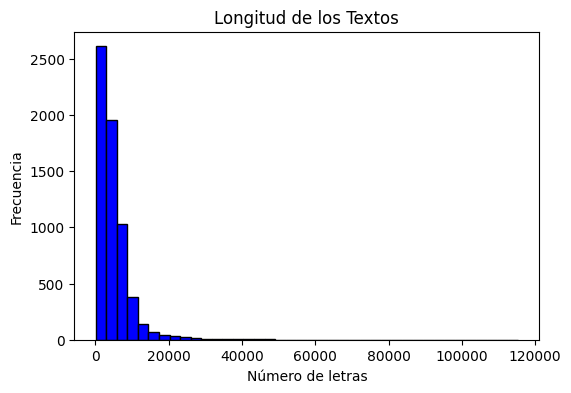

In [5]:
df_unido['longitud_texto'] = df_unido['texto'].apply(len)

plt.figure(figsize = (6,4))
plt.hist (df_unido['longitud_texto'], edgecolor = 'black', facecolor = 'blue', bins=40)
plt.title("Longitud de los Textos")
plt.xlabel("Número de letras")
plt.ylabel("Frecuencia")
plt.show()


In [6]:
df_cantidad = df_unido['Valores'].value_counts().reset_index()
df_cantidad.columns = ['Valores', 'Cantidad']

<ipython-input-7-f4ea73c25b2a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valores', y='Cantidad', data=df_cantidad, palette='mako')


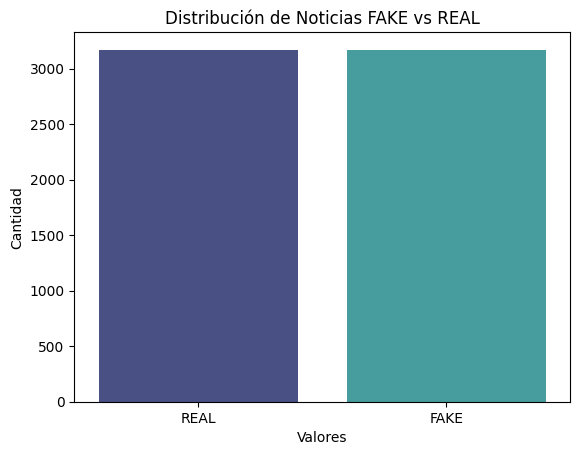

In [7]:
sns.barplot(x='Valores', y='Cantidad', data=df_cantidad, palette='mako')
plt.title("Distribución de Noticias FAKE vs REAL")
plt.show()

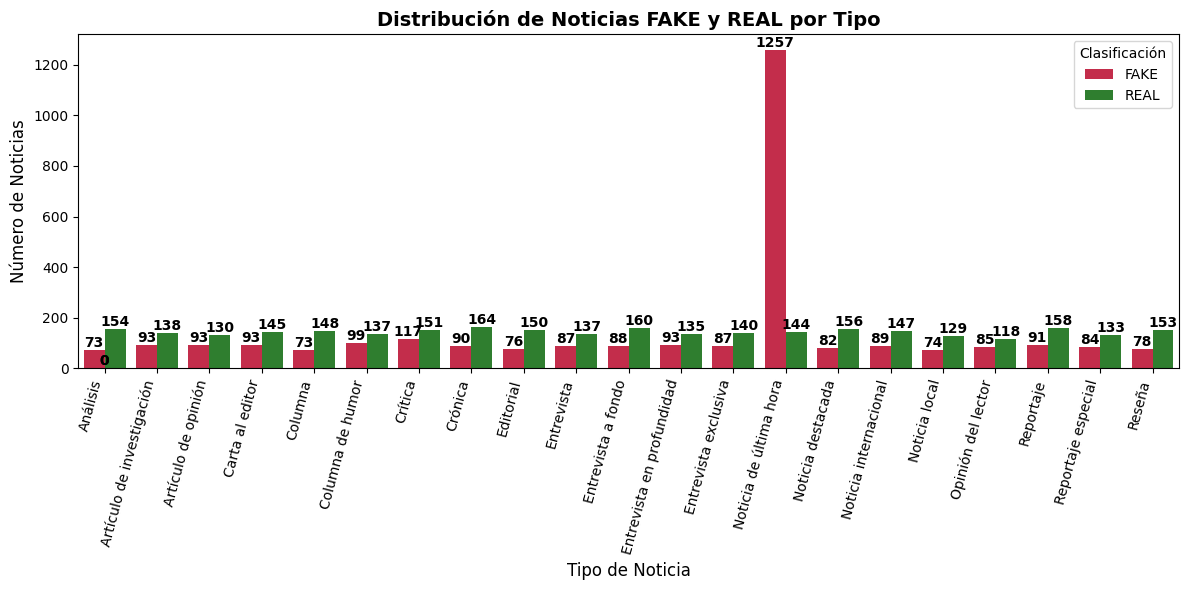

In [8]:

df_unido['Clasificacion'] = df_unido['Valores']

# Agrupar por tipo de noticia y clasificación
df_resumen = df_unido.groupby(['tipo', 'Clasificacion']).size().reset_index(name='Cantidad')

# Visualización
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='tipo',
    y='Cantidad',
    hue='Clasificacion',
    data=df_resumen,
    palette={'FAKE': 'crimson', 'REAL': 'forestgreen'}
)

# Ajustes visuales
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.xlabel("Tipo de Noticia", fontsize=12)
plt.ylabel("Número de Noticias", fontsize=12)
plt.title("Distribución de Noticias FAKE y REAL por Tipo", fontsize=14, fontweight='bold')
plt.legend(title="Clasificación", loc='upper right')

# Etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
df_unido.dtypes

,0
ID,int64
Autor,object
autor_codificado,int64
compartir_tiempo,int64
fecha_compartir,object
hora_compartir,object
titulo,object
texto,object
tematica,object
Fuente,object


In [10]:
df_unido.columns

Index(['ID', 'Autor', 'autor_codificado', 'compartir_tiempo',
       'fecha_compartir', 'hora_compartir', 'titulo', 'texto', 'tematica',
       'Fuente', 'fuente_codificada', 'visitas', 'compartir', 'duracion',
       'favorito', 'tiempo', 'tipo', 'pais', 'idioma', 'Valores',
       'Valores_codificados', 'longitud_texto', 'Clasificacion'],
      dtype='object')

       autor_codificado  compartir_tiempo  fuente_codificada        visitas  \
count       6335.000000       6335.000000        6335.000000    6326.000000   
mean          16.038200        480.672139          16.423994  503070.178312   
std            9.884371        277.421264           9.475553  290739.770774   
min            0.000000          1.000000           0.000000     184.000000   
25%            9.000000        236.500000           8.000000  250726.000000   
50%           15.000000        478.000000          17.000000  507996.000000   
75%           25.000000        719.000000          25.000000  756162.000000   
max           34.000000        960.000000          32.000000  999864.000000   

          compartir     duracion     favorito       tiempo  \
count   6286.000000  5642.000000  5975.000000  6335.000000   
mean   50198.720331   282.394718  4999.909958   482.933070   
std    28963.332794   164.067276  2888.701041   276.692332   
min       13.000000     0.000000     1.0

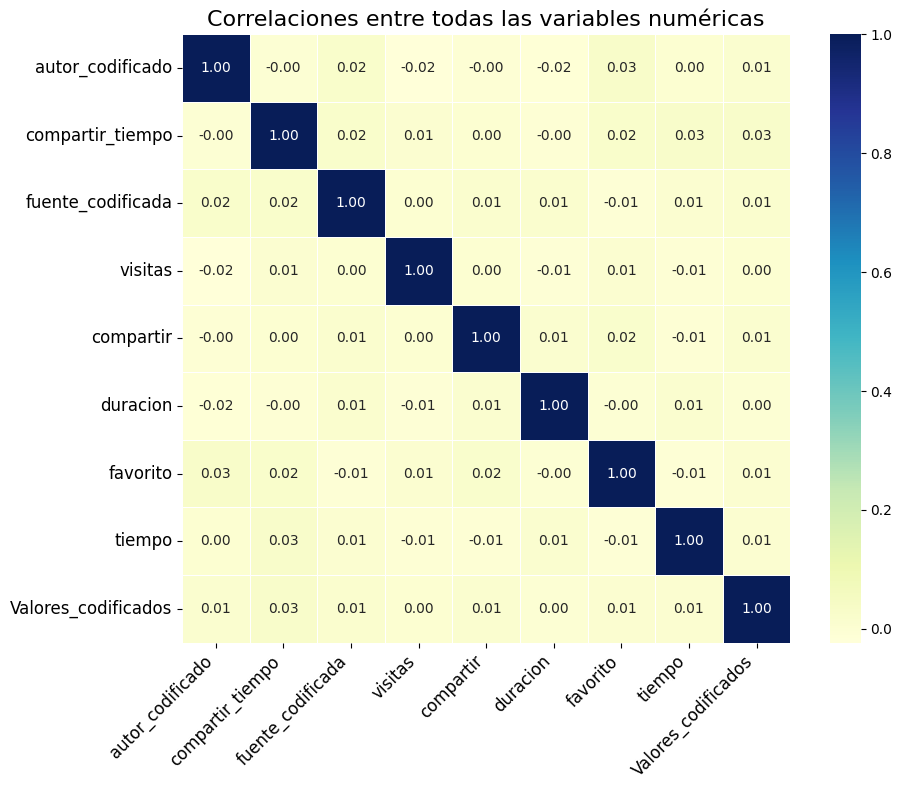


Top 10 correlaciones más fuertes:
autor_codificado     favorito               0.032175
favorito             autor_codificado       0.032175
compartir_tiempo     tiempo                 0.028213
tiempo               compartir_tiempo       0.028213
compartir_tiempo     Valores_codificados    0.025603
Valores_codificados  compartir_tiempo       0.025603
compartir_tiempo     fuente_codificada      0.024786
fuente_codificada    compartir_tiempo       0.024786
autor_codificado     fuente_codificada      0.023295
fuente_codificada    autor_codificado       0.023295
dtype: float64


In [19]:
# Análisis de correlaciones
# Seleccionamos las variables numéricas que queremos analizar
variables_numericas = [
    'autor_codificado', 'compartir_tiempo',
    'fuente_codificada', 'visitas', 'compartir',
    'duracion', 'favorito', 'tiempo', 'Valores_codificados'
]
# Vemos un resumen estadístico para asegurarnos de que las columnas tienen datos variados
print(df_unido[variables_numericas].describe())

# Calculamos la matriz de correlación entre las variables numéricas
correlaciones = df_unido[variables_numericas].corr()
print(correlaciones)

#Visualización de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlaciones,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',         # Puedes probar otros: 'vlag', 'coolwarm', 'Blues', etc.
    annot_kws={"size": 10},
    linewidths=0.5,
    square=True,
    cbar=True
)
plt.title('Correlaciones entre todas las variables numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Mostramos las 10 correlaciones (absolutas) más fuertes, excluyendo la diagonal
print("\nTop 10 correlaciones más fuertes:")
correlaciones_stack = correlaciones.unstack()
correlaciones_ordenadas = correlaciones_stack[
    (correlaciones_stack != 1.0) & (~correlaciones_stack.isna())
].abs().sort_values(ascending=False)
print(correlaciones_ordenadas[:10])

<ipython-input-12-bac7ec539cd7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


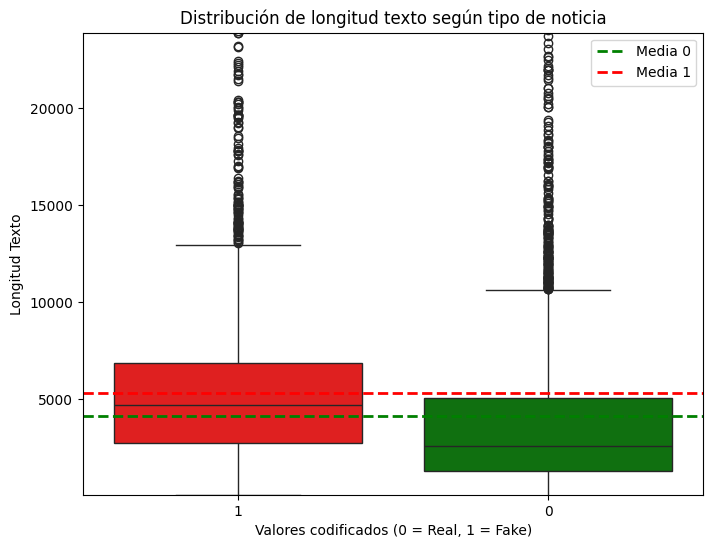

<ipython-input-12-bac7ec539cd7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


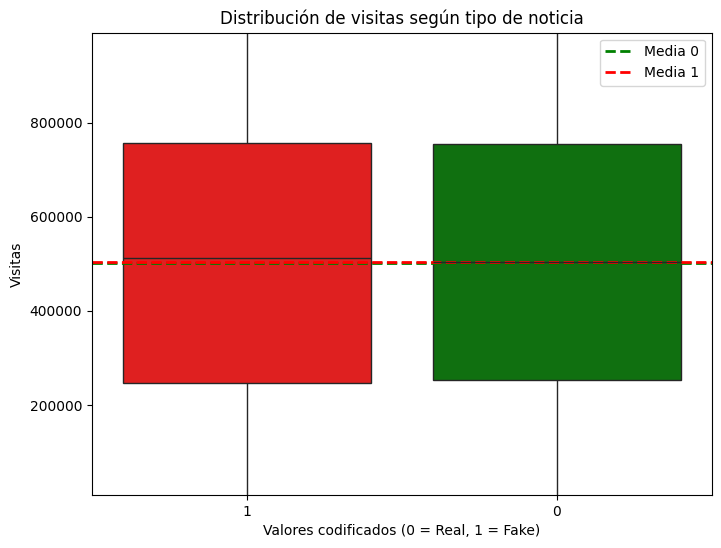

<ipython-input-12-bac7ec539cd7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


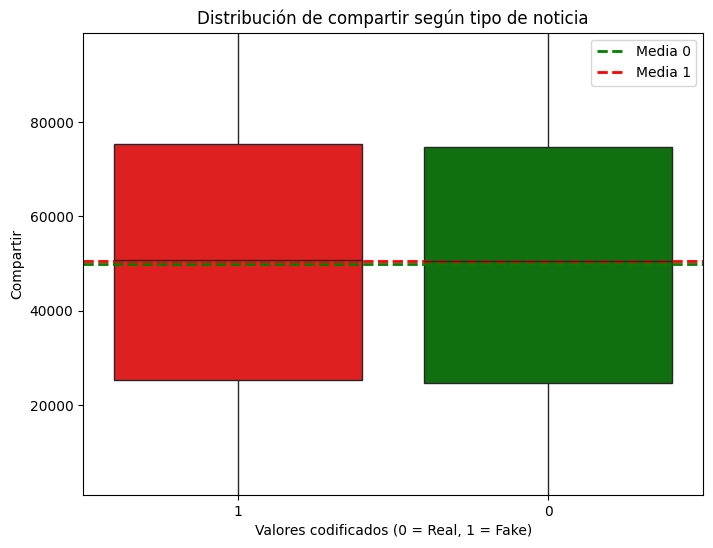

<ipython-input-12-bac7ec539cd7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


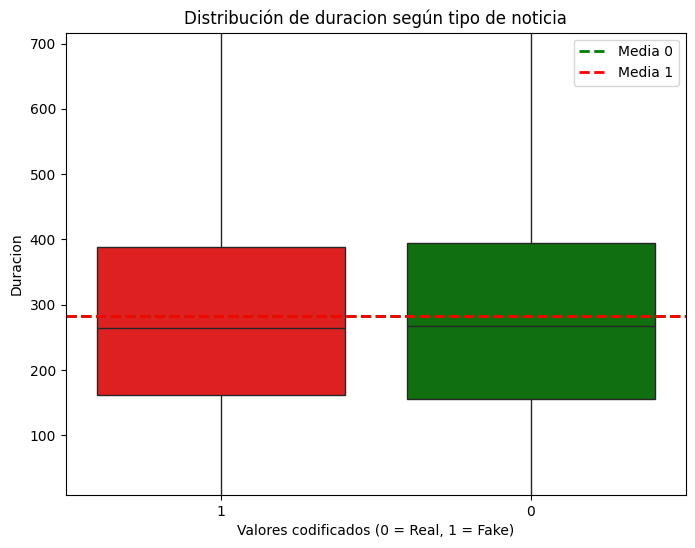

<ipython-input-12-bac7ec539cd7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


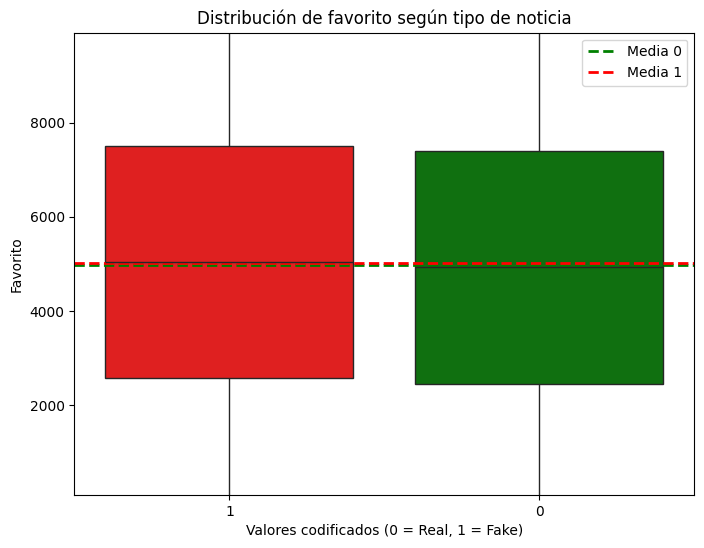

In [12]:
# Pregunta 2: ¿Se guardan más las noticias reales como favoritas o las falsas?
# Lista de variables numéricas a analizar
variables = ['longitud_texto', 'visitas', 'compartir', 'duracion', 'favorito']


# Convertir la variable 'valores_codificados' a string para usar Seaborn
df_unido['Valores_codificados_str'] = df_unido['Valores_codificados'].astype(str)

# Creamos boxplots para poder ver mejor los resultados
for variable in variables:
    plt.figure(figsize=(8, 6))

    # Crear boxplot con colores diferenciados
    ax = sns.boxplot(
        x='Valores_codificados_str',  # Utilizamos los Valores_codificados en string
        y=variable,
        data=df_unido,
        palette={"0": "green", "1": "red"}
    )

    # Calculamos y agregamos la línea de media en cada categoría
    medias = df_unido.groupby('Valores_codificados')[variable].mean()
    for i, mean_value in enumerate(medias):
        plt.axhline(mean_value, color=['green', 'red'][i], linestyle='--', linewidth=2, label=f'Media {i}')

    # Ajustamos los límites del eje Y para evitar valores extremos
    plt.ylim(df_unido[variable].quantile(0.01), df_unido[variable].quantile(0.99))

    # Títulos y leyendas
    plt.title(f'Distribución de {variable.replace("_", " ")} según tipo de noticia')
    plt.xlabel('Valores codificados (0 = Real, 1 = Fake)')
    plt.ylabel(variable.replace("_", " ").title())

    # Mostrar leyenda y gráfico
    plt.legend()
    plt.show()


Tanto las noticias reales como falsas reciben una cantidad similar de favoritos. No se observa una diferencia muy clara que sugiera que un tipo de noticia sea más marcada como favorita que la otro.
 Hay algunas noticias que casi no reciben favoritos y otras que alcanzan valores de casi 10.000 favoritos.


Correlación entre visitas y compartidos: 0.002


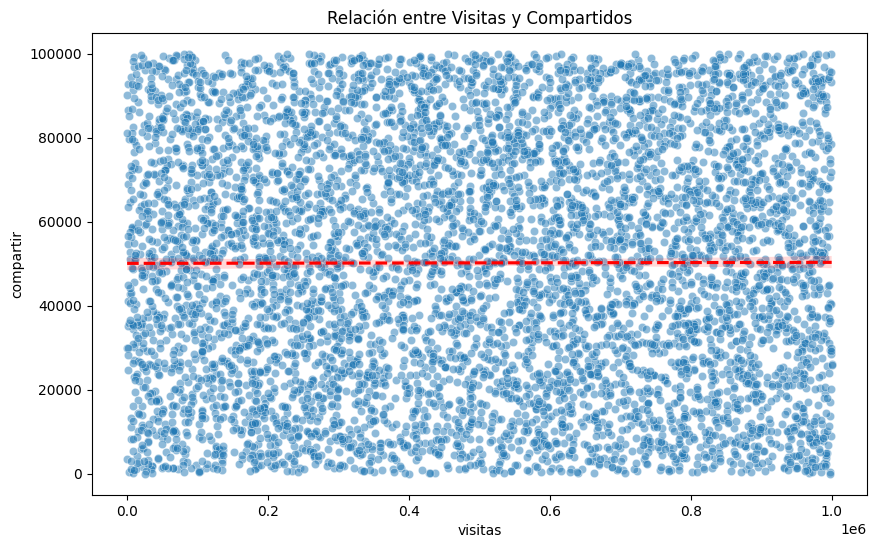


Estadísticas de visitas y compartidos:
             visitas     compartir
count    6326.000000   6286.000000
mean   503070.178312  50198.720331
std    290739.770774  28963.332794
min       184.000000     13.000000
25%    250726.000000  25061.000000
50%    507996.000000  50726.000000
75%    756162.000000  75106.750000
max    999864.000000  99951.000000


In [27]:
# Pregunta 3: ¿Hay una relación entre visitas y compartidos?

# Calcular la correlación
correlacion = df_unido['visitas'].corr(df_unido['compartir'])
print(f"\nCorrelación entre visitas y compartidos: {correlacion:.3f}")

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unido, x='visitas', y='compartir', alpha=0.5)
plt.title('Relación entre Visitas y Compartidos')
plt.xlabel('Número de Visitas')
plt.ylabel('Número de Compartidos')

# Añadir línea de tendencia
sns.regplot(data=df_unido, x='visitas', y='compartir',
            scatter=False, color='red', line_kws={'linestyle': '--'})
plt.show()

# Estadísticas adicionales
print("\nEstadísticas de visitas y compartidos:")
print(df_unido[['visitas', 'compartir']].describe())

No hay una correlación fuerte entre visitas y compartidos.

No hay una correlación que nos muestre que más visitas llevan a más comparticiones, este gráfico sugiere que podrían ser otros factores los que influirían más en que una noticia se compartiera más y se hiciera viral.


In [20]:

# Filtramos solo las noticias FAKE
fake_news = df_unido[df_unido['Valores_codificados'] == 1]

# Unimos todos los textos de las noticias FAKE en un solo string
texto_fake = " ".join(fake_news['texto'].astype(str))

# Ponemos los textos en minúsculas y los separamos en palabras
palabras = texto_fake.lower().split()

# Contamos las palabras más frecuentes
contador = Counter(palabras)

# Mostramos las 50 palabras más frecuentes
palabras_mas_frecuentes = contador.most_common(50)
print("Palabras más frecuentes en noticias FAKE:")
for palabra, frecuencia in palabras_mas_frecuentes:
    print(f"{palabra}: {frecuencia}")



Palabras más frecuentes en noticias FAKE:
the: 158369
to: 78897
of: 68540
a: 64513
and: 63418
in: 56963
that: 38401
for: 26415
is: 26301
on: 24151
he: 20800
as: 17850
with: 17141
his: 15961
was: 15703
it: 13688
have: 13437
has: 13156
at: 13142
but: 13002
be: 12663
are: 12493
not: 12160
by: 11943
from: 11107
who: 10887
this: 10830
said: 10775
trump: 10448
an: 10301
they: 9304
about: 8442
will: 7967
more: 7706
would: 7705
or: 7285
their: 7258
clinton: 7182
i: 6760
she: 6652
her: 6650
we: 6554
been: 6203
had: 6160
—: 6160
were: 5895
one: 5747
new: 5582
if: 5358
than: 5338


In [21]:
# Filtramos solo las noticias REAL
fake_news = df_unido[df_unido['Valores_codificados'] == 0]

# Unimos todos los textos de las noticias FAKE en un solo string
texto_real = " ".join(fake_news['texto'].astype(str))

# Pasamos los textos a minúsculas y los separamos en palabras
palabras = texto_real.lower().split()

# Contamos las palabras más frecuentes
contador = Counter(palabras)

# Mostramos las 50 palabras más frecuentes
palabras_mas_frecuentes = contador.most_common(50)
print("Palabras más frecuentes en noticias REAL:")
for palabra, frecuencia in palabras_mas_frecuentes:
    print(f"{palabra}: {frecuencia}")

Palabras más frecuentes en noticias REAL:
the: 127518
of: 60678
to: 59469
and: 53860
a: 41995
in: 39592
that: 28231
is: 26417
for: 19186
on: 15533
as: 14124
with: 13230
it: 12805
are: 12514
by: 12199
this: 11882
be: 11355
was: 10970
have: 10461
not: 9540
from: 9314
has: 8986
they: 8556
at: 8170
he: 7911
you: 7808
i: 7691
we: 7668
an: 7509
but: 7137
will: 7042
or: 6664
their: 6662
his: 6264
who: 6075
about: 5378
all: 5358
if: 5101
been: 5080
would: 4844
clinton: 4819
what: 4803
which: 4593
trump: 4558
more: 4527
one: 4464
our: 4422
were: 4298
people: 4290
can: 4248


In [22]:
#Saber que idiomas hay
print(df_unido['idioma'].unique())

['English']


In [25]:
#Saber las palabras más utilizadas en noticias FAKE quitando las palabras más frecuentes
# Obtenemos la lista de palabras comunes en inglés
stopwords_es = set(stopwords.words('english'))

# Filtramos solo las noticias FAKE
real_news = df_unido[df_unido['Valores_codificados'] == 1]

# Unimos todos los textos de las noticias REAL en un solo string
texto_FAKE = " ".join(real_news['texto'].astype(str))

# Convertir a minúsculas y separar en palabras
palabras = texto_fake.lower().split()

# Quitamos las palabras que están en la lista de stopwords
palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_es]

# Contamos las palabras más frecuentes pero ya sin stopwords)
from collections import Counter
contador = Counter(palabras_filtradas)

# Mostrar las 20 palabras más frecuentes
palabras_mas_frecuentes = contador.most_common(20)
print("Palabras más frecuentes en noticias FAKE (sin stopwords):")
for palabra, frecuencia in palabras_mas_frecuentes:
    print(f"{palabra}: {frecuencia}")

Palabras más frecuentes en noticias FAKE (sin stopwords):
said: 10775
trump: 10448
would: 7705
clinton: 7182
—: 6160
one: 5747
new: 5582
people: 4987
also: 4954
republican: 4656
said.: 4599
president: 4469
state: 4312
campaign: 4084
obama: 4072
could: 3972
--: 3843
like: 3591
even: 3442
two: 3276


In [24]:
#Saber las palabras más utilizadas en noticias REAL quitando las palabras más frecuentes
# Conseguir la lista de palabras comunes en inglés
stopwords_es = set(stopwords.words('english'))

# Filtramos solo las noticias REAL
real_news = df_unido[df_unido['Valores_codificados'] == 0]

# Unimos todos los textos de las noticias REAL en un solo string
texto_real = " ".join(real_news['texto'].astype(str))

# Convertir a minúsculas y separar en palabras
palabras = texto_real.lower().split()

# Quitar las palabras que están en la lista de stopwords
palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_es]

# Contar las palabras más frecuentes, ahora ya sin stopword
from collections import Counter
contador = Counter(palabras_filtradas)

# Mostrar las 20 palabras más frecuentes
palabras_mas_frecuentes = contador.most_common(20)
print("Palabras más frecuentes en noticias REAL (sin stopwords):")
for palabra, frecuencia in palabras_mas_frecuentes:
    print(f"{palabra}: {frecuencia}")

Palabras más frecuentes en noticias REAL (sin stopwords):
would: 4844
clinton: 4819
trump: 4558
one: 4464
people: 4290
us: 4123
hillary: 3744
new: 3343
–: 3177
also: 3069
,: 3023
like: 3005
even: 2859
.: 2818
said: 2625
—: 2569
many: 2479
could: 2448
american: 2269
it’s: 2135


 Tras analizar las palabras más frecuentes en las noticias FALSAS y REALES,y filtrarlas quitando las más comunes, podemos observar que no hay una sola palabra que distinga claramente entre los dos tipos de noticias. Las palabras más repetidas son muy generales y aparecen en ambos grupos, lo que indica que la diferencia entre noticias falsas y reales no depende de una sola palabra, sino de patrones más complejos en el texto.



